# Introduction to Preprocessing

Preprocessing refers to TRANSFORMING or MODIFYING variables **BEFORE** running or executing an analysis.

This notebook demonstrates WHY you need to PREPROCESS variables **BEFORE** running KMeans!!!

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

Use the Penguins data.

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


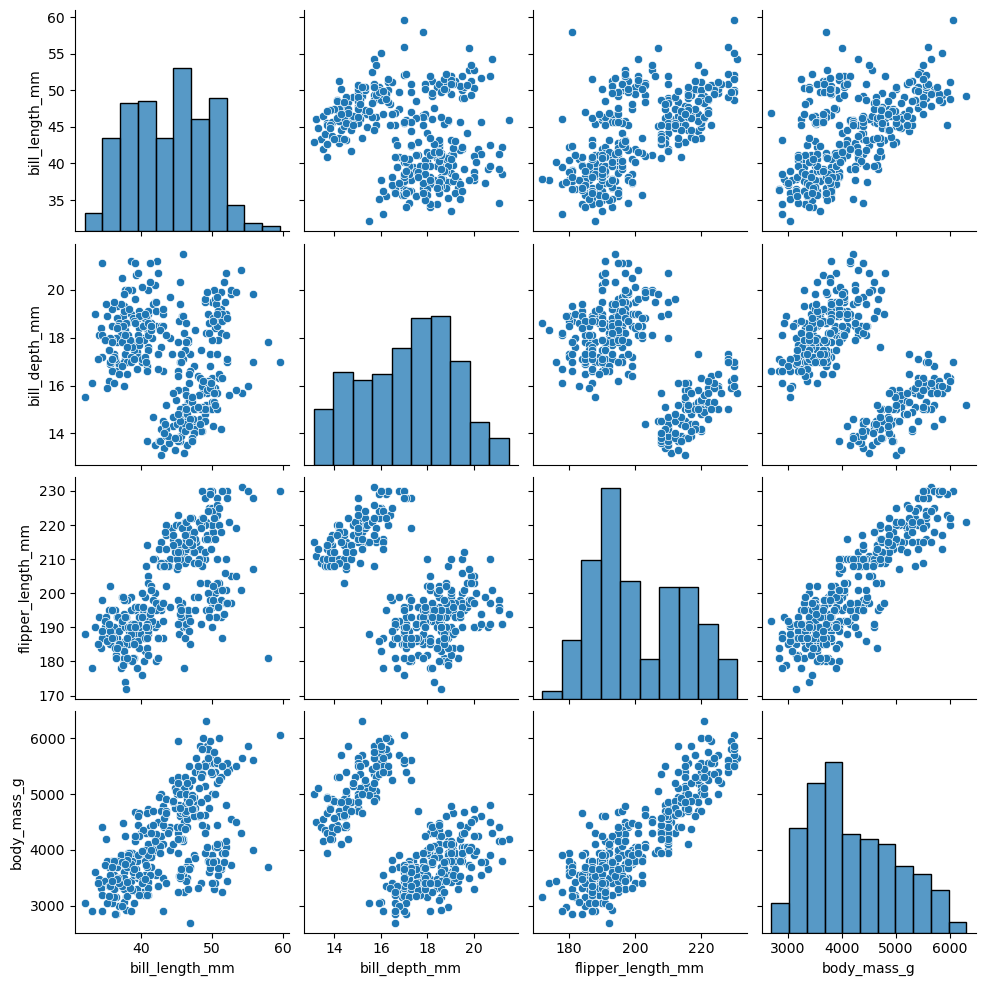

In [4]:
sns.pairplot(data = penguins)

plt.show()

BUT...before you execute KMeans...YOU MUST EXPLORE THE DATA!!!!!

You MUST visually explore the DISTRIBUTIONS NOT JUST by creating a pairs plot!!!

To see why...let's use a WIDE FORMAT plotting operation from Seaborn!

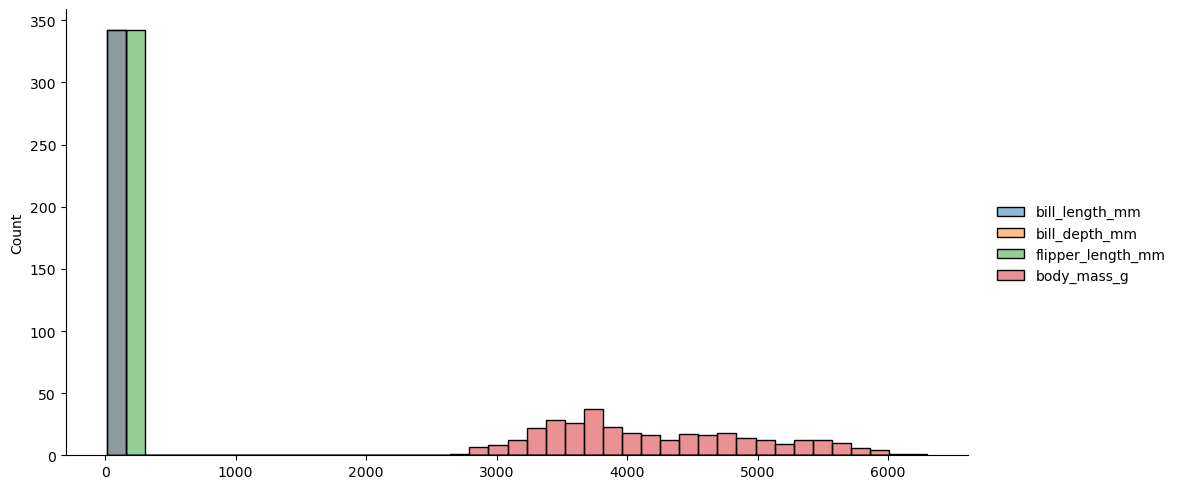

In [5]:
sns.displot(data = penguins, aspect=2)

plt.show()

A boxplot from the WIDE FORMAT plotting operations makes it even easier to KNOW what's going on!

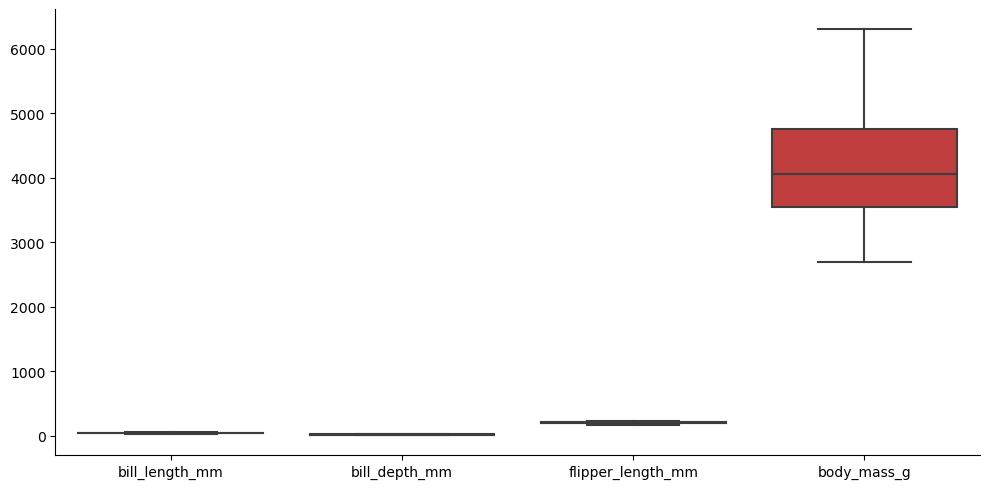

In [6]:
sns.catplot(data = penguins, kind='box', aspect=2)

plt.show()

Why does it MATTER that 1 variable DOMINATES the magnitude and scale???

**REMEMBER** that KMeans considers SIMILAR to be based on DISTANCE!!!!

Distance depends on MAGNITUDE and Distance depends on SCALE!!!!

In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


If we use the columns with their RAW values, the magnitudes and scales will IMPACT the cluster results!!!!

We do NOT want the magnitudes and scales to impact things!!!

Essentially we want to work with variables that are ROUGHLY the same magnitude and scale!!!

We need to REMOVE the scale and thus TRANSFORM or MODIFY the variables!!!!!

That's why we must preprocess!!!!

## Preprocess

There are many different PREPROCESSING operations. But we will focus on 1 very important approach.

### Standardization

Standardizing means you are calculating the **Z-SCORE**.

What is the **Z-SCORE**? It's the NUMBER of standard deviations away from the average!!!!!!!

It requires 2 summary statistics:

* Sample average
* Sample standard deviation

The Z-score is calculated by:
* Centering - subtract the value from the SAMPLE AVERAGE
* Scale - divide the CENTERED value by the SAMPLE STANDARD DEVIATION

Demonstrate on one numeric column in `penguins`.

In [8]:
penguins_z = penguins.copy()

In [9]:
penguins_z.flipper_length_mm.mean()

200.91520467836258

In [10]:
penguins_z.flipper_length_mm.std()

14.061713679356894

CENTER:

In [11]:
( penguins_z.flipper_length_mm - penguins_z.flipper_length_mm.mean() )

0     -19.915205
1     -14.915205
2      -5.915205
3            NaN
4      -7.915205
         ...    
339          NaN
340    14.084795
341    21.084795
342    11.084795
343    12.084795
Name: flipper_length_mm, Length: 344, dtype: float64

SCALE:

In [12]:
( penguins_z.flipper_length_mm - penguins_z.flipper_length_mm.mean() ) / penguins_z.flipper_length_mm.std()

0     -1.416272
1     -1.060696
2     -0.420660
3           NaN
4     -0.562890
         ...   
339         NaN
340    1.001641
341    1.499447
342    0.788296
343    0.859411
Name: flipper_length_mm, Length: 344, dtype: float64

Assign the z-score to a new column.

In [13]:
penguins_z['flipper_length_zscore'] = ( penguins_z.flipper_length_mm - penguins_z.flipper_length_mm.mean() ) / penguins_z.flipper_length_mm.std()

Compare the original or RAW variable to its STANDARDIZED or Z-score value.

In [14]:
penguins_z.loc[ :, ['flipper_length_mm', 'flipper_length_zscore'] ]

,flipper_length_mm,flipper_length_zscore
0,181.0,-1.416272
1,186.0,-1.060696
2,195.0,-0.420660
3,NaN,NaN
4,193.0,-0.562890
...,...,...
339,NaN,NaN
340,215.0,1.001641
341,222.0,1.499447
342,212.0,0.788296


Compare the SUMMARY STATISTICS between the two.

In [16]:
penguins_z.loc[ :, ['flipper_length_mm', 'flipper_length_zscore'] ].describe().round(3)

,flipper_length_mm,flipper_length_zscore
count,342.000,342.000
mean,200.915,-0.000
std,14.062,1.000
min,172.000,-2.056
25%,190.000,-0.776
50%,197.000,-0.278
75%,213.000,0.859
max,231.000,2.139


Standardization is also called NORMALIZATION...but I HATE that term because it sounds like we converting the variable to a NORMAL distribution!!

BUT THAT is COMPLETELY WRONG!!!! Standardizing does **NOT** change the distributional shape!!!

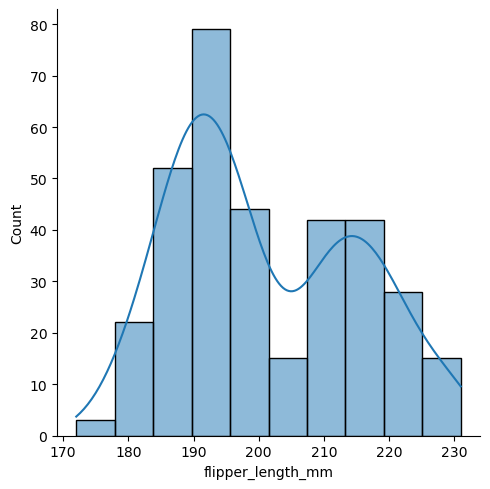

In [17]:
sns.displot(data = penguins_z, x='flipper_length_mm', kind='hist', kde=True)

plt.show()

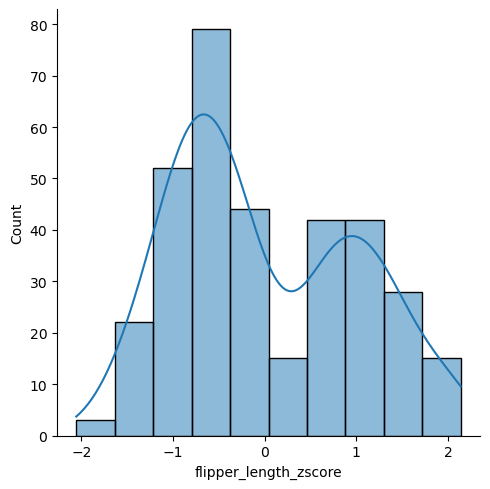

In [18]:
sns.displot(data = penguins_z, x='flipper_length_zscore', kind='hist', kde=True)

plt.show()

Standardizing REMOVES the MAGNITUDE and SCALE and returns negative and positive values around 0.

## Preprocess with scikit-learn

scikit-learn has MANY functions to support machiine learning and data science.

scikit-learn has functions specializing in PREPROCESSING operations!

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
%whos

Variable         Type         Data/Info
---------------------------------------
StandardScaler   type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
penguins         DataFrame        species     island  b<...>n\n[344 rows x 7 columns]
penguins_z       DataFrame        species     island  b<...>n\n[344 rows x 8 columns]
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns              module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


Just like `KMeans()` all scikit-learn functions follow the following recipe:

* INITIALIZE the object based on assumptions
* FIT the OBJECT given a data set
* PREDICT or TRANSFORM a data set using the FITTED object

`KMeans()` returns cluster labels by PREDICTING, but `StandardScaler()` returns the STANDARDIZED columns by TRANSFORMING!!!!

Begin by INITIALIZING!!!

In [21]:
pens_standardize = StandardScaler()

In [22]:
type( pens_standardize )

sklearn.preprocessing._data.StandardScaler

We need to identify the columns that we will standardize.

In [23]:
pens_features = penguins.select_dtypes('number').copy()

In [24]:
pens_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB


Preprocessing CAN WORK with Pandas DataFrames!!!!!

FIT using the dataframe consisting of just the numeric columns!

In [25]:
pens_standardize = pens_standardize.fit( pens_features )

TRANSFORM the numeric columns!

In [26]:
Xpens = pens_standardize.transform( pens_features )

In [27]:
type( Xpens )

numpy.ndarray

In [28]:
Xpens.shape

(344, 4)

In [29]:
pens_features.shape

(344, 4)

You can accomplish INTIIALIZE, FIT, and TRANSFORM in a single line of code!

In [30]:
StandardScaler().fit_transform( pens_features ).shape

(344, 4)

Convert the returned NumPy array into a DataFrame to support visualizing with Seaborn.

In [31]:
pd.DataFrame( Xpens, columns=pens_features.columns )

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,NaN,NaN,NaN,NaN
4,-1.324737,1.089724,-0.563715,-0.938776
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,0.527932,-1.445897,1.003109,0.809516
341,1.188289,-0.735923,1.501644,1.933419
342,0.234440,-1.192335,0.789451,1.246590


As a reminder...`body_mass_g` DOMINATES the magnitude and scale in the RAW data!

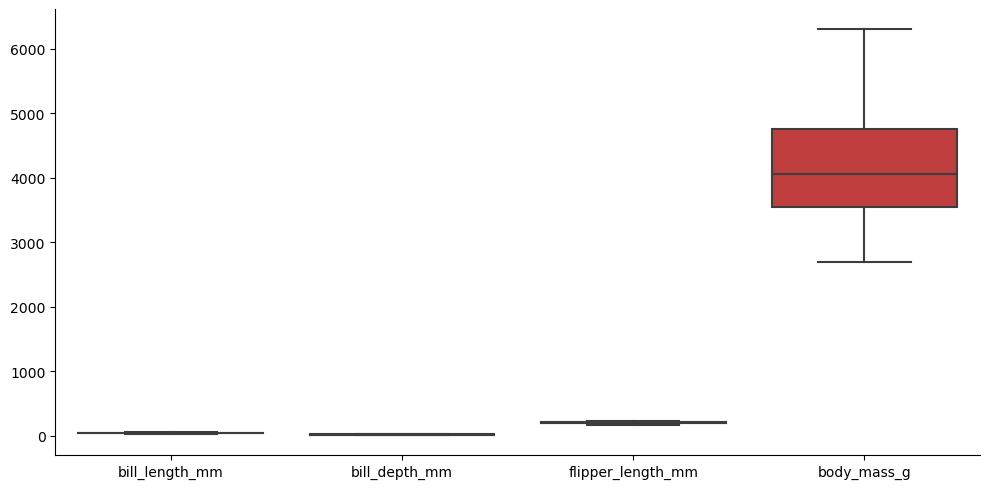

In [32]:
sns.catplot(data = penguins, kind='box', aspect=2)

plt.show()

But does `body_mass_g` still dominate based on the STANDARDIZED or preprocessed variables?

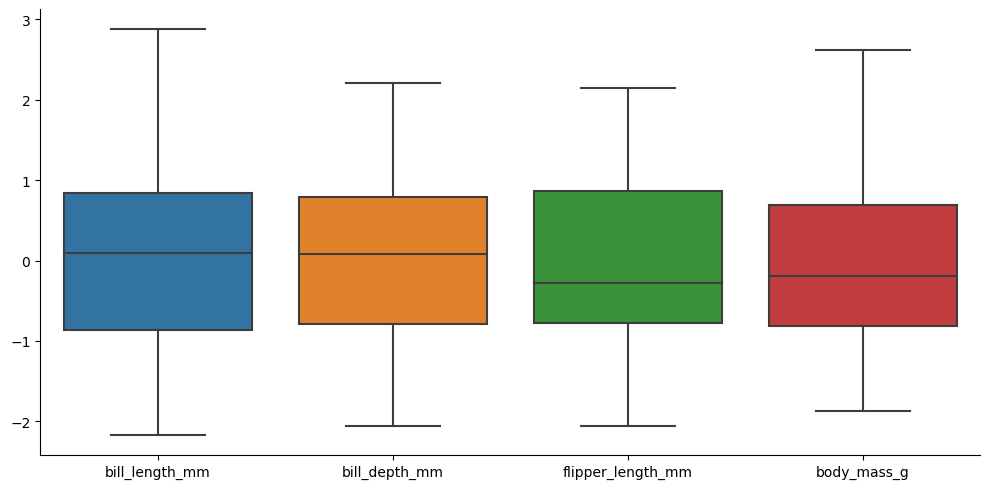

In [33]:
sns.catplot(data = pd.DataFrame(Xpens, columns=pens_features.columns), kind='box', aspect=2)

plt.show()

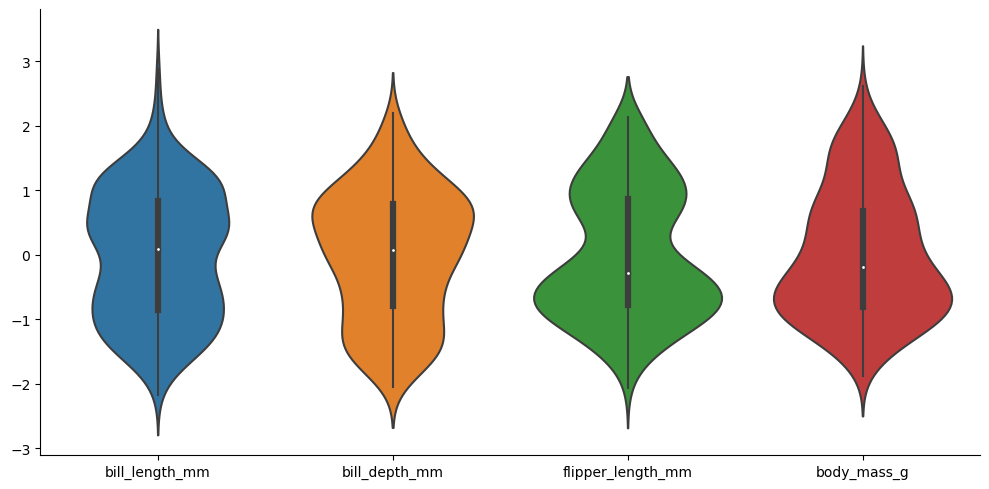

In [34]:
sns.catplot(data = pd.DataFrame(Xpens, columns=pens_features.columns), kind='violin', aspect=2)

plt.show()

Standardizing does **NOT** modify the RELAIONSHIPS between the columns!

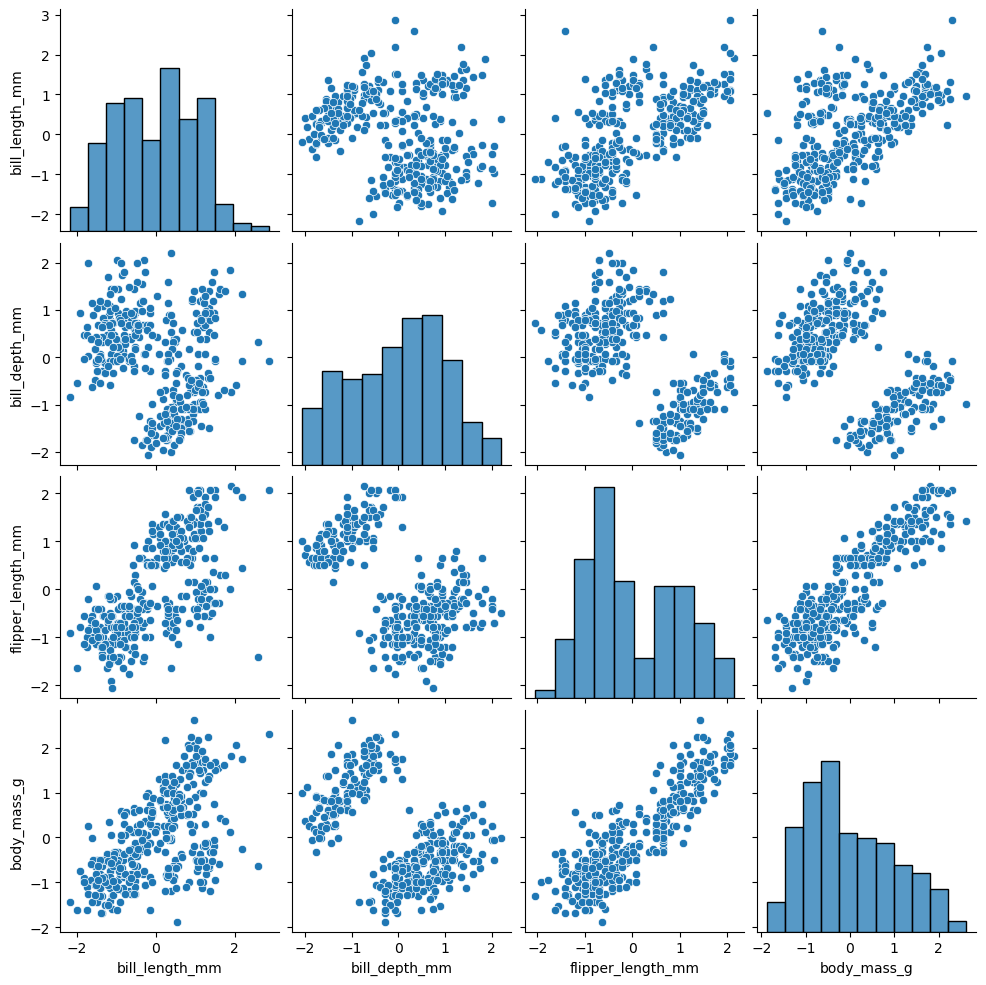

In [35]:
sns.pairplot(data = pd.DataFrame(Xpens, columns=pens_features.columns))

plt.show()

The CORRELATION is UNCHANGED!!!!

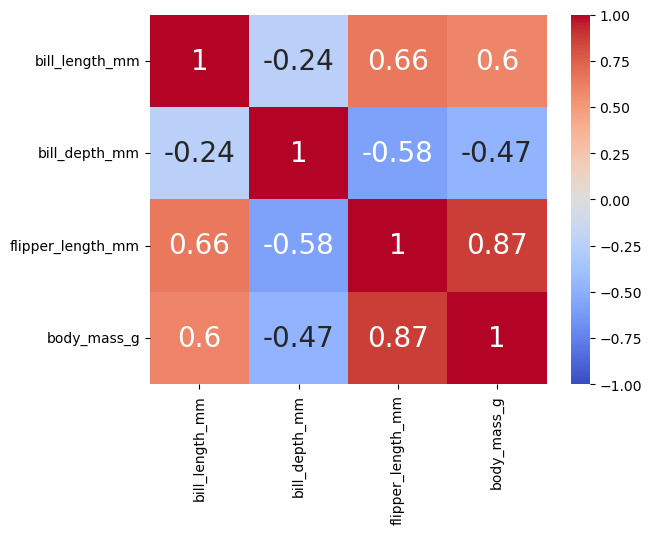

In [36]:
fig, ax = plt.subplots()

sns.heatmap( data = penguins.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'fontsize': 20},
            ax=ax)

plt.show()

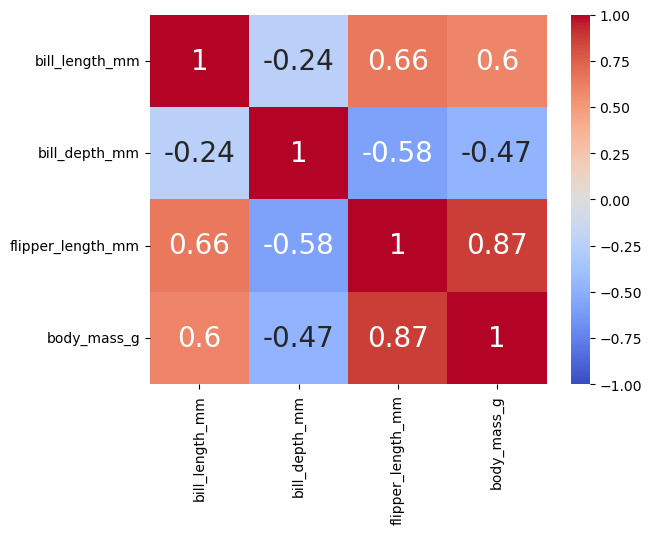

In [37]:
fig, ax = plt.subplots()

sns.heatmap( data = pd.DataFrame(Xpens, columns=pens_features.columns).corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'fontsize': 20},
            ax=ax)

plt.show()